In [9]:
#!/usr/bin/env python
# coding: utf-8
# Two hidde layer network
# In[1]:


import numpy as np
import tensorflow as tf
import etp as etp
import calculate_virtual_coordinates as cvc
import matplotlib.pyplot as plt

from random import seed
from random import randint

import pickle
seed(23)

C = 5 # maximum number of anchors
H1 = 500 # size of hidden filters
H2 = 500 # size of hidden filters
F = 2 # Final dimension of coordinates
random_seed = 23
radius = 1 # extent of possible communication
MAX_NODES = 1000
learning_rate = 0.2
epochs = 1000
display_cost_period = 10
num_iter = 5


# In[2]:


def plot_learning(cost_history):
    plt.plot(cost_history)
    plt.xlabel('Number of Graphs')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.show()


# In[3]:


g = tf.Graph()

with g.as_default():
    tf.set_random_seed(random_seed)
    W_0 = tf.Variable(tf.truncated_normal(shape=(C, H1),
                                      mean=0.0,
                                      stddev=0.1,
                                      dtype=tf.float32,
                                      seed=random_seed), name='wt_1')
    
    W_1 = tf.Variable(tf.truncated_normal(shape=(H1, H2),
                                  mean=0.0,
                                  stddev=0.1,
                                  dtype=tf.float32,
                                  seed=random_seed), name='wt_2')

    W_2 = tf.Variable(tf.truncated_normal(shape=(H2, F),
                                    mean=0.0,
                                    stddev=0.1,
                                    dtype=tf.float32,
                                    seed=random_seed), name='wt_3')
    

    input_layer = tf.placeholder(tf.float32, [None, C], # INPUT: num_of_nodes X VC_values
                                 name='input')
    
    physical_coordinates = tf.placeholder(tf.float32, [None, F], # INPUT: num_of_nodes X geographic_coordinates
                                 name='phy_coord')
    
    adj = tf.placeholder(tf.float32, [None, None], # INPUT: num_of_nodes X num_of_nodes
                                 name='adj')
    
    A_caret = tf.placeholder(tf.float32, [None, None], # INPUT: num_of_nodes X num_of_nodes
                                 name='A_caret')

    
    out_1 = tf.matmul(tf.matmul(A_caret, input_layer), W_0)
    out_1 = tf.nn.relu(out_1)
    out_2 = tf.matmul(tf.matmul(A_caret, out_1), W_1)
    out_2 = tf.nn.relu(out_2)
    
    out_3 = tf.matmul(tf.matmul(A_caret, out_2), W_2)
    
    
    cost = tf.losses.mean_squared_error(out_3, physical_coordinates)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    saver = tf.train.Saver()
    
    writer = tf.summary.FileWriter("./graphs", sess.graph)

    

 


# In[ ]:




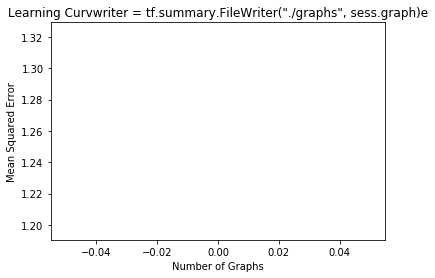

Epoch: 0	 cost: 1.2598743438720703	
Epoch: 1	 cost: 2.2797837257385254	
Epoch: 2	 cost: 2.8861939907073975	
Epoch: 3	 cost: 1.0653668642044067	
Epoch: 4	 cost: 168.57760620117188	
Epoch: 5	 cost: 334.0212097167969	
Epoch: 6	 cost: 2057.418212890625	
Epoch: 7	 cost: 14760.3916015625	
Epoch: 8	 cost: 1.2766730785369873	
Epoch: 9	 cost: 1.6401766538619995	


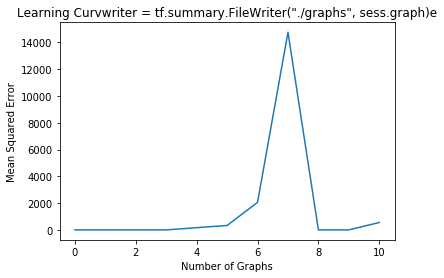

Epoch: 10	 cost: 556.0330200195312	
Epoch: 11	 cost: 1.9776936769485474	
Epoch: 12	 cost: 47.195186614990234	
Epoch: 13	 cost: 3.8669235706329346	
Epoch: 14	 cost: 1336.5809326171875	
Epoch: 15	 cost: 1.7169636487960815	
Epoch: 16	 cost: 207.35601806640625	
Epoch: 17	 cost: 26.813703536987305	
Epoch: 18	 cost: 399.4757080078125	
Epoch: 19	 cost: 39689.921875	


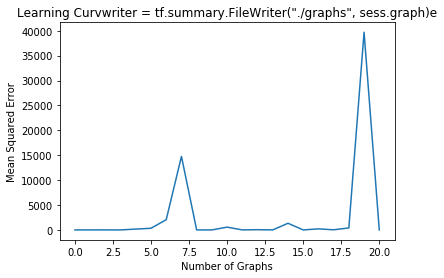

Epoch: 20	 cost: 1.8846091032028198	
Epoch: 21	 cost: 222.83592224121094	
Epoch: 22	 cost: 1.4127588272094727	
Epoch: 23	 cost: 651.8847045898438	
Epoch: 24	 cost: 21597.98046875	
Epoch: 25	 cost: 1299.307373046875	
Epoch: 26	 cost: 13271.1396484375	
Epoch: 27	 cost: 2.2622134685516357	
Epoch: 28	 cost: 3.445875883102417	
Epoch: 29	 cost: 2.966787815093994	


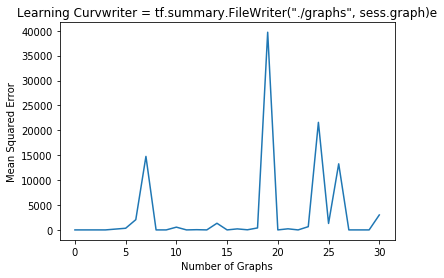

Epoch: 30	 cost: 3003.5400390625	
Epoch: 31	 cost: 1.27462637424469	
Epoch: 32	 cost: 1743.7662353515625	
Epoch: 33	 cost: 443.54132080078125	
Epoch: 34	 cost: 45.635406494140625	
Epoch: 35	 cost: 142.43467712402344	
Epoch: 36	 cost: 75.14147186279297	
Epoch: 37	 cost: 2135.049072265625	
Epoch: 38	 cost: 0.897659182548523	
Epoch: 39	 cost: 1.093396544456482	


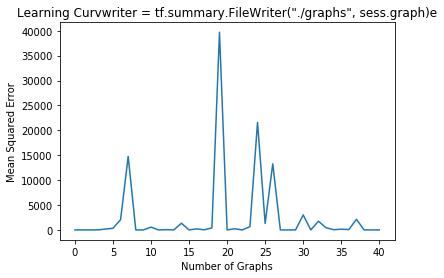

Epoch: 40	 cost: 1.3874398469924927	
Epoch: 41	 cost: 287.3162841796875	
Epoch: 42	 cost: 139.6428985595703	
Epoch: 43	 cost: 1.2746000289916992	
Epoch: 44	 cost: 1.5117266178131104	
Epoch: 45	 cost: 485.5214538574219	
Epoch: 46	 cost: 29.349262237548828	
Epoch: 47	 cost: 2.155379056930542	
Epoch: 48	 cost: 2212.88720703125	
Epoch: 49	 cost: 1.3535935878753662	
Model saved in path: model_h_2_g_1000_alpha_7.ckpt


In [3]:
cost_history = []
etp_history = []
with tf.Session(graph=g) as sess:
    # `sess.graph` provides access to the graph used in a `tf.Session`.
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    

    # Perform your computation...
    for i in range(epochs):
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        
#         phy_coord, inps = cvc.get_VC(randint(10, MAX_NODES))
        phy_coord, inps = cvc.get_VC(randint(10, MAX_NODES))
        adj_matrix = cvc.get_adj(phy_coord)
        A_caret_matrix = cvc.normalize_adj(adj_matrix + np.eye(adj_matrix.shape[0]))
        
        sum_cost = 0
        for _ in range(num_iter):
            curr_cost = sess.run(cost, feed_dict={input_layer: inps,
                                            physical_coordinates: phy_coord,
                                            adj: adj_matrix,
                                            A_caret: A_caret_matrix})
            sum_cost += curr_cost 

        
        cost_history.append(sum_cost/num_iter)
        
#         if not i%display_cost_period:
#             plot_learning(cost_history)
        
    


        print('Epoch: {}\t cost: {}\t'.format(i, sum_cost/num_iter))
        
    save_path = saver.save(sess, "model_h_2_g_1000_alpha_7.ckpt")
    print("Model saved in path: {}".format(save_path))
        
        
        
            

    writer.close()


# In[ ]:


with open('h_2', 'wb') as fp:
    pickle.dump(cost_history, fp)

In [10]:
# plot_learning(cost_history)